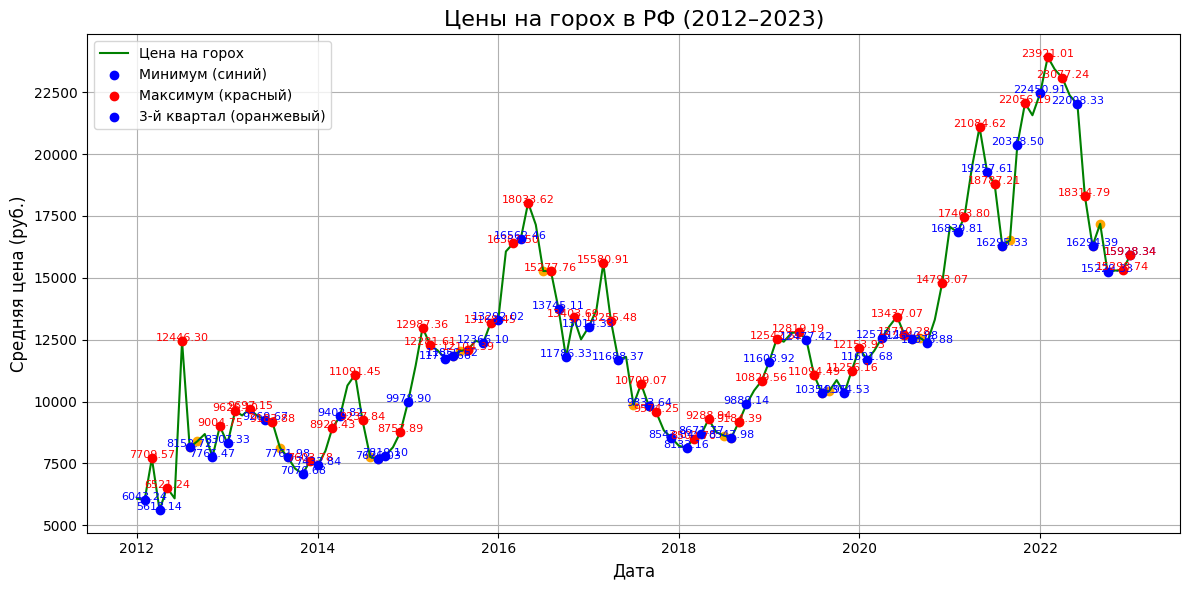

In [19]:
# 1. график цены от времени (переделать, минимумы и максимумы не верные)
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Подготовка данных
def gorokh_prepare(path):
    df = pd.read_csv(path)
    df = df.rename(columns={
        'Месяц': 'month', 
        'Квартал': 'quarter', 
        'Год': 'year', 
        'РФ, средняя цена': 'price'}
    )
    df['price_date'] = df[['year', 'month']].apply(lambda row: datetime(*row, 1), axis=1)
    return df[['month', 'quarter', 'year', 'price_date', 'price']]

# Загружаем данные
gorokh_path = './goroh.csv'  # путь к файлу
data = gorokh_prepare(gorokh_path)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(data['price_date'], data['price'], label="Цена на горох", color="green")

# Группировка данных по годам и кварталам
grouped = data.groupby(['year', 'quarter'])

for (year, quarter), group in grouped:
    min_row = group.loc[group['price'].idxmin()]  # Минимальная цена
    max_row = group.loc[group['price'].idxmax()]  # Максимальная цена

    plt.scatter(min_row['price_date'], min_row['price'], color="blue", zorder=2)
    plt.text(min_row['price_date'], min_row['price'], f"{min_row['price']:.2f}", 
             color="blue", fontsize=8, ha='center')

    plt.scatter(max_row['price_date'], max_row['price'], color="red", zorder=2)
    plt.text(max_row['price_date'], max_row['price'], f"{max_row['price']:.2f}", 
             color="red", fontsize=8, ha='center')

# Выделение третьего квартала
third_quarter = data[data['quarter'] == 3]
plt.scatter(third_quarter['price_date'], third_quarter['price'], 
            color="orange", label="3-й квартал", zorder=1) # не добился показа оранжевого маркера для третьего квартала каждого года, почему то рисует синий

# Настройки графика
plt.title("Цены на горох в РФ (2012–2023)", fontsize=16)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Средняя цена (руб.)", fontsize=12)
plt.legend(["Цена на горох", "Минимум (синий)", "Максимум (красный)", "3-й квартал (оранжевый)"], fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


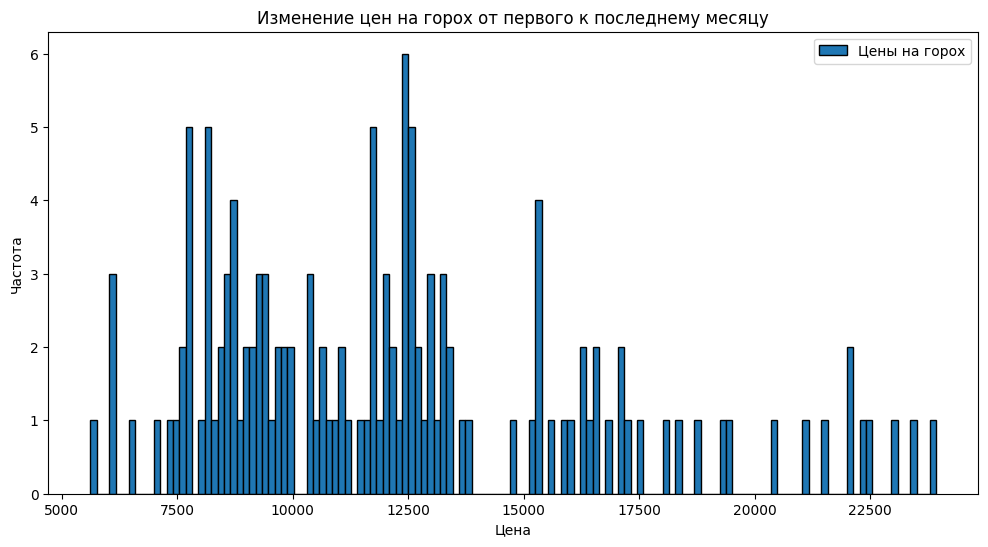

In [1]:
#2. Гистограмма, показывающая изменение цен от первого месяца к последнему
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Функция подготовки данных
def gorokh_prepare(path):
    df = pd.read_csv(path)
    
    # Переименовываем столбцы
    df = df.rename(columns={
        'Месяц': 'month',
        'Квартал': 'quarter',
        'Год': 'year',
        'РФ, средняя цена': 'price'
    })
    
    # Создаем колонку даты
    df['price_date'] = df[['year', 'month']].apply(
        lambda row: datetime(row['year'], row['month'], 1),
        axis=1
    )
    
    return df[['month', 'quarter', 'year', 'price_date', 'price']]

# Путь к файлу
gorokh_path = './goroh.csv'

# Подготовка данных
data = gorokh_prepare(gorokh_path)

plt.figure(figsize=(12, 6))

# Построение гистограммы
plt.hist(data['price'], bins=len(data), edgecolor='black')
plt.title('Изменение цен на горох от первого к последнему месяцу')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.legend(['Цены на горох'])
plt.show()

C:\Users\Z0rg3\AppData\Local\Temp\ipykernel_12584\1300491150.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=regions, patch_artist=True,


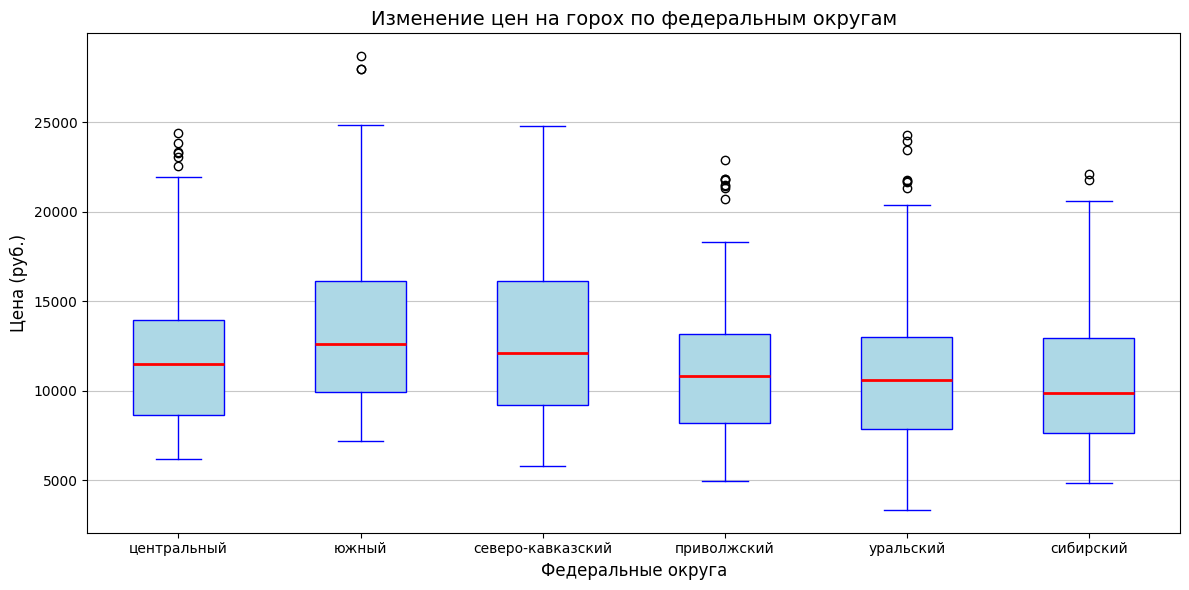

In [26]:
# 3. «ящик с усами», для изменения цен от месяца к месяцу в разных федеральных округах
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Функция для подготовки данных
def gorokh_prepare(path):
    df = pd.read_csv(path)
    df = df.rename(columns={
        'Месяц': 'month',
        'Квартал': 'quarter',
        'Год': 'year',
        'Центральный ФО': 'центральный',
        'Южный ФО': 'южный',
        'Северо-Кавказский ФО': 'северо-кавказский',
        'Приволжский ФО': 'приволжский',
        'Уральский ФО': 'уральский',
        'Сибирский ФО': 'сибирский',
        'РФ, средняя цена': 'средняя_цена'
    })
    df['price_date'] = df[['year', 'month']].apply(lambda row: datetime(row['year'], row['month'], 1), axis=1)
    columns = ['price_date', 'month', 'quarter', 'year',
               'центральный', 'южный', 'северо-кавказский', 
               'приволжский', 'уральский', 'сибирский', 'средняя_цена']
    return df[columns]

# Подготовка данных
gorokh_path = './goroh.csv'
data = gorokh_prepare(gorokh_path)

regions = ['центральный', 'южный', 'северо-кавказский', 'приволжский', 'уральский', 'сибирский']
boxplot_data = [data[region].dropna() for region in regions]

# Построение графика
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=regions, patch_artist=True, 
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red", linewidth=2),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"))

# Построение графика
plt.title('Изменение цен на горох по федеральным округам', fontsize=14)
plt.xlabel('Федеральные округа', fontsize=12)
plt.ylabel('Цена (руб.)', fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
 9   brand         398 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 31.2+ KB


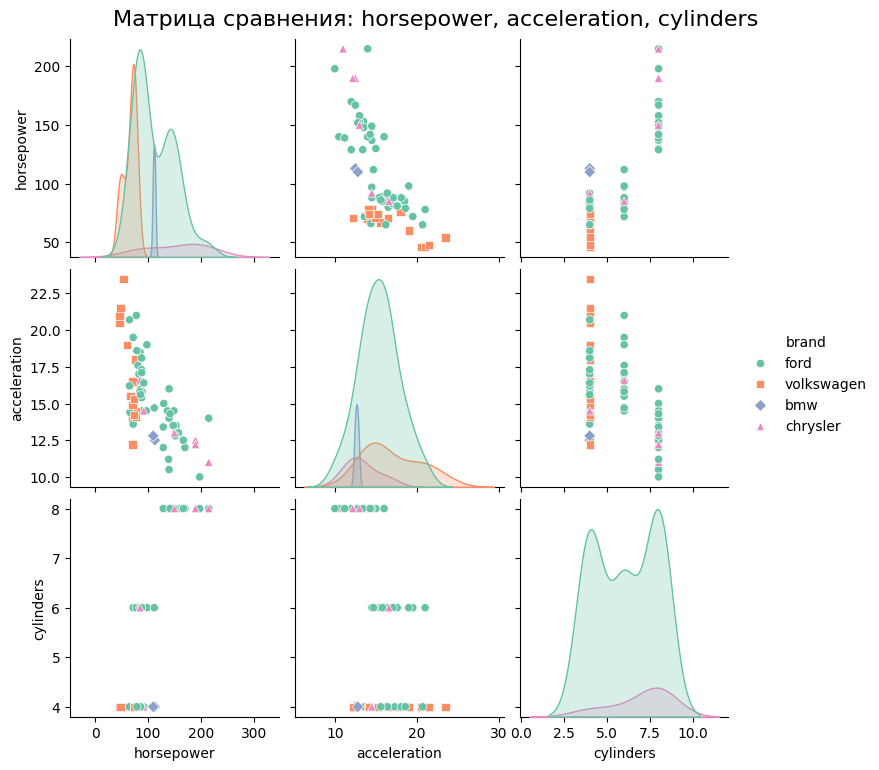

In [ ]:
# 4. Визуализируйте данные по набору MPG
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных и предварительная обработка
df = sns.load_dataset('mpg')
df['brand'] = df['name'].str.split().str[0].str.lower()  # Преобразуем бренды к нижнему регистру
brands = ['bmw', 'ford', 'chrysler', 'volkswagen']
sub_df = df[df['brand'].isin(brands)]

df.info()
df.head()
df.describe()

# Построение матрицы сравнения
sns.pairplot(
    data=sub_df,
    vars=['horsepower', 'acceleration', 'cylinders'],
    hue='brand',  # Раскраска по брендам
    diag_kind='kde',  # Используем KDE для диагональных графиков
    palette='Set2',  # Цветовая схема
    markers=['o', 's', 'D', '^']  # Маркеры для разных брендов
)

plt.suptitle('Матрица сравнения: horsepower, acceleration, cylinders', y=1.02, fontsize=16)
plt.show()


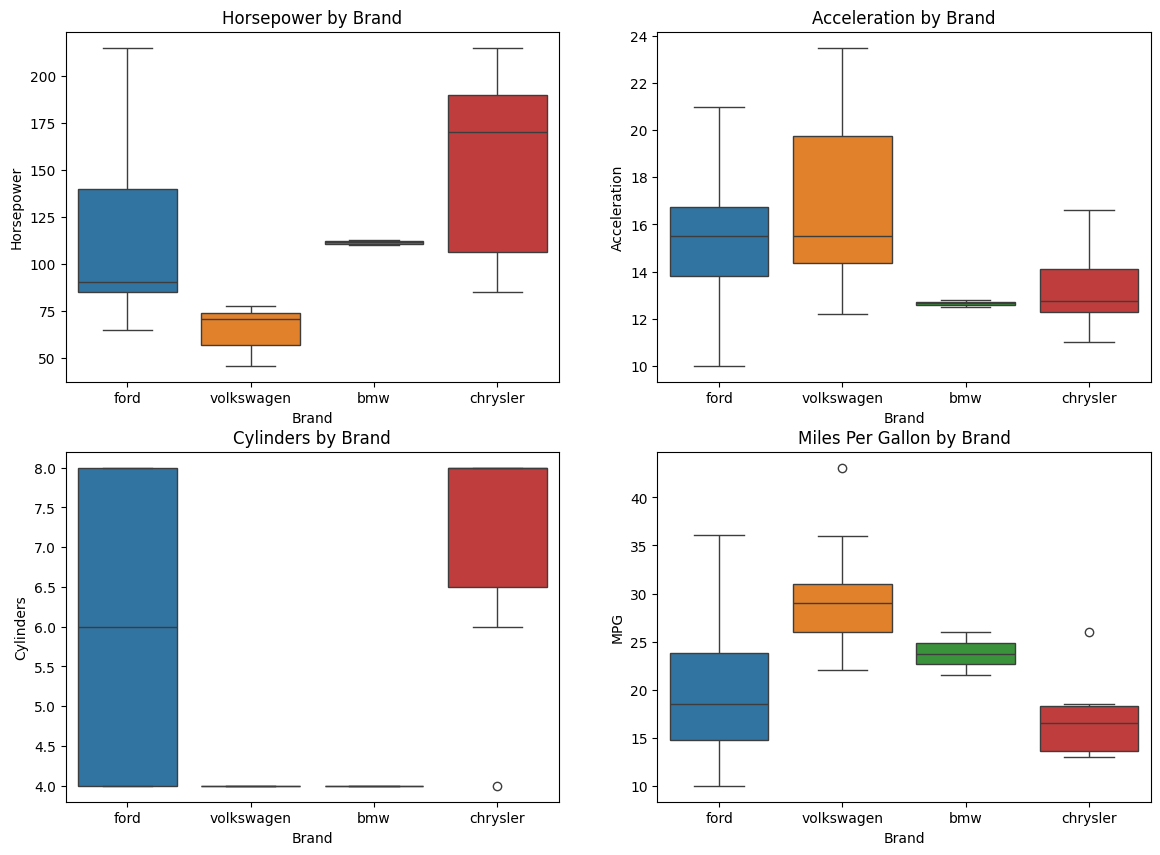

In [35]:
# 5. Постройте четыре графика, используя subplots
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных и фильтрация по брендам
cars_df = sns.load_dataset('mpg')
cars_df['brand'] = cars_df.name.str.split().str[0]
brands = ['bmw', 'ford', 'chrysler', 'volkswagen']
cars_sub_df = cars_df[cars_df.brand.isin(brands)]

# Создание фигуры и осей с использованием subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 строки, 2 столбца

# 1. Boxplot для horsepower (явный интерфейс Axes)
sns.boxplot(
    data=cars_sub_df, x='brand', y='horsepower', hue='brand', ax=axes[0, 0], legend=False
)
axes[0, 0].set_title('Horsepower by Brand')
axes[0, 0].set_ylabel('Horsepower')
axes[0, 0].set_xlabel('Brand')

# 2. Boxplot для acceleration (явный интерфейс Axes)
sns.boxplot(
    data=cars_sub_df, x='brand', y='acceleration', hue='brand', ax=axes[0, 1], legend=False
)
axes[0, 1].set_title('Acceleration by Brand')
axes[0, 1].set_ylabel('Acceleration')
axes[0, 1].set_xlabel('Brand')

# 3. Boxplot для cylinders (неявный интерфейс Pyplot)
plt.sca(axes[1, 0])  # Выбор оси для pyplot
sns.boxplot(data=cars_sub_df, x='brand', y='cylinders', hue='brand', legend=False)
plt.title('Cylinders by Brand')
plt.ylabel('Cylinders')
plt.xlabel('Brand')

# 4. Boxplot для MPG (неявный интерфейс Pyplot)
plt.sca(axes[1, 1])  # Выбор оси для pyplot
sns.boxplot(data=cars_sub_df, x='brand', y='mpg', hue='brand', legend=False)
plt.title('Miles Per Gallon by Brand')
plt.ylabel('MPG')
plt.xlabel('Brand')

plt.show()


In [40]:
# 6. Постройте с помощью PyVTK модель правильной равносторонней пирамиды и сохраните её в файле pyramid.vtk
import numpy as np
from pyvtk import PolyData, VtkData

list_of_point = [
    (0, 0, 0),  # A
    (1, 0, 0),  # B
    (0.5, np.sqrt(3)/2, 0),  # C
    (0.5, 1/(2*np.sqrt(3)), np.sqrt(3)/2)  # D (вершина пирамиды)
]

list_of_polygons = [
    (0, 1, 2),  # Основание
    (0, 1, 3),  # Боковая грань 1
    (1, 2, 3),  # Боковая грань 2
    (2, 0, 3)   # Боковая грань 3
]
# Создание структуры
structure = PolyData(
    points=list_of_point,
    polygons=list_of_polygons
)

# Экспорт в VTK-файл
vtk = VtkData(structure)
vtk.tofile('pyramid', 'ascii')

In [39]:
# 7. Визуализируйте набор данных penguins из пакета seaborn
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import seaborn as sns

# Загрузка данных
df = sns.load_dataset('penguins')

# Инициализация приложения Dash
app = dash.Dash(__name__)

# Layout приложения
app.layout = html.Div([
    html.H1("Распределение массы тела пингвинов", style={'textAlign': 'center'}),
    
    # Dropdown для выбора пола
    html.Label("Выберите пол особей:"),
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Male', 'value': 'Male'},
            {'label': 'Female', 'value': 'Female'}
        ],
        value=['Male', 'Female'],  # Значение по умолчанию
        multi=True
    ),
    
    # Слайдер для минимальной массы тела
    html.Label("Минимальное значение массы тела (г):"),
    dcc.Slider(
        id='slider',
        min=df['body_mass_g'].min(),
        max=df['body_mass_g'].max(),
        step=50,
        value=df['body_mass_g'].min(),  # Значение по умолчанию
        marks={int(i): str(int(i)) for i in range(int(df['body_mass_g'].min()), int(df['body_mass_g'].max()) + 1, 100)}
    ),
    
    # График
    dcc.Graph(id='graph')
])

# Callback для обновления графика
@app.callback(
    Output("graph", "figure"),
    [Input("dropdown", "value"),
     Input("slider", "value")]
)
def update_boxplot(selected_sexes, min_body_mass):
    # Фильтрация данных
    filtered_df = df[
        df['sex'].isin(selected_sexes) & 
        (df['body_mass_g'] > min_body_mass)
    ]
    
    # Построение графика
    fig = px.box(
        filtered_df,
        x='species',
        y='body_mass_g',
        color='species',
        title="Распределение массы тела пингвинов",
        labels={'species': 'Вид пингвинов', 'body_mass_g': 'Масса тела (г)'}
    )
    return fig

# Запуск приложения
if __name__ == '__main__':
    app.run_server(debug=True)